# Self Study 4: Fixed Points and Stability

## Section 1: Linear Stability Analysis

In this section, you will create a Python function to analyze the fixed points and their stability.

In [5]:
# Import libraries
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

### Task 1: Function to Find Fixed Points

Write a Python function, `find_fixed_points`, that takes an ODE function and initial guesses for fixed points, and returns the calculated fixed points.

Use `fsolve` from `scipy.optimize` to find the fixed points based on your initial guesses. Note this will only find one fixed point at a time, so you will need to use multiple "initial guesses" to find all the fixed points.

In this first part we do it numerically. 

Later we will use a different method to find all the fixed points at once, with symbolic math (`sympy`).


In [6]:
def find_fixed_points(ode_func, initial_guesses):
    # your code here
    fixed_points = fsolve(ode_func, initial_guesses)
    return fixed_points

### Task 2: Function for Linear Stability Analysis

Write another Python function, `linear_stability_analysis`, that takes an ODE function, its fixed points, and returns the stability type ("Stable" or "Unstable") of each fixed point.

**Hint**: Perturb the fixed point by a small value $\Delta$ and check the sign of the ODE.


In [7]:
def linear_stability_analysis(ode_func, fixed_points, delta=1e-3):
    # your code here
    stability = []
    for point in fixed_points:
        perturbation = ode_func(point+delta)
        if perturbation < 0:
            stability.append("Stable")
        else:
            stability.append("Unstable")
    return stability

### Task 3: Combine Into `stability` Function

Combine `find_fixed_points` and `linear_stability_analysis` into a single function named `stability`. This function should take an ODE and initial guesses for fixed points, and print out each fixed point along with its stability type.


In [8]:
def stability(ode_func, initial_guesses: list[int], delta=1e-3):
    # Find fixed points
    # your code here
    fixed_points = initial_guesses
    for i in range(3):
        fixed_points = find_fixed_points(ode_func, initial_guesses)
    
    # Analyze stability
    # your code here
    stabilities = linear_stability_analysis(ode_func, fixed_points)
    
    # Print results
    # your code here
    for i in range(len(stabilities)):
        print(str(fixed_points[i]) + ": " + str(stabilities[i]))


### Task 4: Explore Various ODEs

### Example 1: Logistic Equation

Use the `stability` function to analyze the logistic equation:

$$
\frac{dN}{dt} = rN \left(1 - \frac{N}{K}\right)
$$

### Example 2: Exponential Growth

Use the `stability` function to analyze the exponential growth equation:

$$
\frac{dN}{dt} = rN
$$

### Example 3: A function of your choice


In [9]:
# Example 1: Logistic Equation
def logistic_eq(N, t=None):
    r = 0.1  # Growth rate
    K = 100  # Carrying capacity
    return r * N * (1 - N / K)

print("Logistic Equation Stability Analysis:")
stability(logistic_eq, initial_guesses=[0, 200])


Logistic Equation Stability Analysis:
0.0: Unstable
100.0: Stable


In [10]:
# Example 2: Exponential Growth
def exponential_growth(N, t=None):
    r = 0.1  # Growth rate
    return r * N

print("\nExponential Growth Stability Analysis:")
stability(exponential_growth, initial_guesses=[0, 10])


Exponential Growth Stability Analysis:
0.0: Unstable
0.0: Unstable


In [11]:
def third_order_eq(t):
    return t**3-2*t**2+3

stability(third_order_eq, initial_guesses=[-2, 3])

-1.0001084021921451: Unstable
1.3334477579408068: Unstable


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


## Section 2: A Labor Market Example



#### Background

The dynamics of the labor market can be modeled by the following system of equations:

The rate of change of wage ($ w $) is dependent on the difference between labor demand ($ l^d $) and labor supply ($ l^s $):

$$
\dot{w} = \beta (l^d - l^s)
$$
where $ \beta $ is a positive constant.

Labor demand decreases linearly with wage:
$$
l^d(w) = \mu - \gamma w
$$
where $\mu$ and $\gamma$ are positive constants.

Labor supply is a function of wage and is influenced by the "negative income effect":
   * As wages increase, income increases, leading to a greater demand for leisure and a decrease in labor supply after a certain point.

### Part 1: Setup

 **Labor Supply and Demand Functions**: Write a Python function `labor_supply(w, alpha, delta)` that models $ l^s(w) $ using a quadratic function.
   - The function should initially increase with $ w $ but should decrease after reaching a peak (i.e., a quadatic function `alpha * x - delta * x**2`).
   
Labour demand decreases linearly with wage: $ l^d(w) = \mu - \gamma w $ where $ \mu $ and $ \gamma $ are positive constants.

In [12]:
def labor_supply(w, alpha, delta):
    # Your code here
    l_s = -delta*w**2 + alpha*w
    return l_s

def labor_demand(w, mu, gamma):
    # Your code here
    l_d = mu-gamma*w
    return l_d

**Wage Dynamics**: Write a Python function `wage_dynamics(w, beta, mu, gamma, alpha, delta)` that returns $ \dot{w} $ based on the given $ w $ and parameters.

In [13]:
def wage_dynamics(w, beta, mu, gamma, alpha, delta):
    ld = labor_demand(w, mu, gamma)
    ls = labor_supply(w, alpha, delta)
    return beta*(ld-ls)


In [14]:
# Define parameters for the example
beta = 1
mu = 10
gamma = 1
alpha = 2
delta = 0.1

**Visualization**: Plot $ \dot{w} $ as a function of $ w $ for different sets of parameters $ \beta, \mu, \gamma, \alpha, \delta $. **Hint**: use `ipywidgets` interact

In [15]:
from ipywidgets import interact

@interact(beta = (0,5,0.1), mu=(2,20,0.1), gamma=(0,10,0.1), alpha=(0,5,0.1), delta=(0,3,0.1), w0=(0,10,0.1))
def plot_wage_dynamics(beta=1, mu=10, gamma=1, alpha=2, delta=0.1, w0=2):
    # Your code here
    w = np.linspace(0,50,500)
    dynamics = wage_dynamics(w, beta, mu, gamma, alpha, delta)
    plt.figure(figsize=(12,6))
    plt.plot(w, dynamics)
    plt.plot(w,[0]*500)
    plt.grid(True)
    # sol = odeint(wage_dynamics,w0 t, args=(beta, mu, gamma, alpha, delta))

interactive(children=(FloatSlider(value=1.0, description='beta', max=5.0), FloatSlider(value=10.0, description…

From the graph, we can see that:

- When $ \dot{w} > 0 $, the wage $ w $ is increasing over time.
- When $ \dot{w} < 0 $, the wage $ w $ is decreasing over time.

### Section 3: Fixed Points and Stability (Labour Market)

Solve the system of equations to find the fixed points, either analytically or using `sympy` (see [sympy documentation](https://docs.sympy.org/latest/modules/solvers/solvers.html#system-of-nonlinear-equations)).


$$
\dot{w} = \beta (l^d - l^s) = \beta (\mu - \gamma w - (\alpha w - \delta w^2))
$$

To find the equilibrium points, we need to solve $ \dot{w} = 0 $. To do so, this time we will use `sympy` to solve the system of equations. Read the [sympy documentation](https://docs.sympy.org/latest/modules/solvers/solvers.html#system-of-nonlinear-equations) to learn how to use `sympy` to solve a system of nonlinear equations.

In [17]:
from sympy import symbols, solve

# Define variables and parameters
beta, l_d, l_s = symbols('beta l^d l^s')
mu, gamma, w, alpha, delta = symbols('mu gamma w alpha delta')
l_d = mu - gamma*w
l_s = alpha*w - delta*w**2

# Define the equation for equilibrium
w_d = beta*(l_d-l_s)

# Solve for equilibrium wage
sols = solve(w_d, w)
sols[0]

(alpha + gamma - sqrt(alpha**2 + 2*alpha*gamma - 4*delta*mu + gamma**2))/(2*delta)

Use starting cod below to find the fixed points of the system of equations and plot the wage dynamics for different sets of parameters.

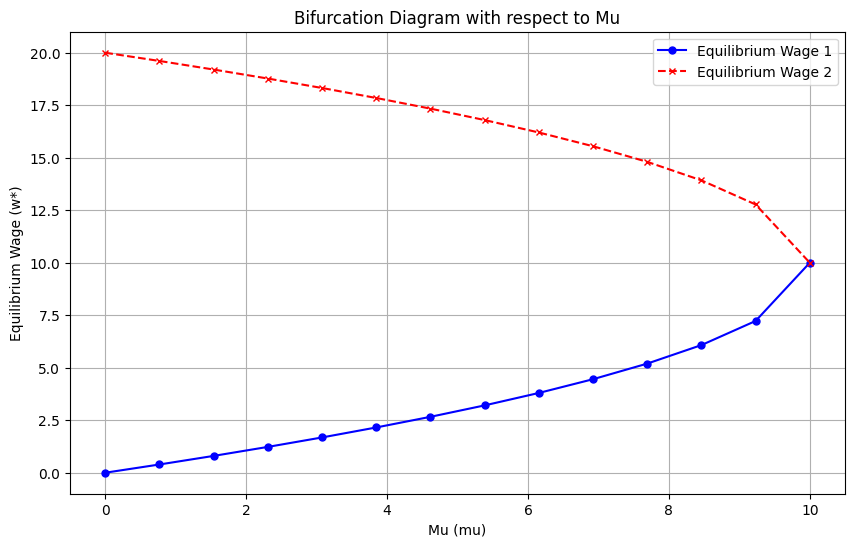

In [35]:
# Define a range of mu values for the bifurcation analysis
mu_values = np.linspace(0, 30, 40)

# Initialize lists to store equilibrium wages
equilibrium_wages_mu_1 = []
equilibrium_wages_mu_2 = []

# Loop through each mu value and solve for equilibrium wages
for mu_value in mu_values:
    equilibrium_wage = [sol.subs({alpha:1, delta: 0.1, gamma: 1, mu: mu_value}) for sol in sols]  # sympy solve here for specific mu value

    try:
        # Append existing equilibria; use None if equilibrium does not exist
        equilibrium_wages_mu_1.append(float(equilibrium_wage[0]) if len(equilibrium_wage) > 0 else None)
        equilibrium_wages_mu_2.append(float(equilibrium_wage[1]) if len(equilibrium_wage) > 1 else None)
    except TypeError:
        equilibrium_wages_mu_1.append(None)
        equilibrium_wages_mu_2.append(None)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mu_values, equilibrium_wages_mu_1, label='Equilibrium Wage 1', marker='o', markersize=5, linestyle='-', color='blue')
plt.plot(mu_values, equilibrium_wages_mu_2, label='Equilibrium Wage 2', marker='x', markersize=5, linestyle='--', color='red')
plt.xlabel('Mu (mu)')
plt.ylabel('Equilibrium Wage (w*)')
plt.title('Bifurcation Diagram with respect to Mu')
plt.legend()
plt.grid(True)
plt.show()
